# What Areas Should the Agency Focus On?

## The goal of this exercise is to do explore the data to find the answer to the Question 2 problem statement:

### Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

### In this exercise, you will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type you decided to focus at the end of the last exercise.

#### My approach to this exercise is simple.  The plan is to explore the data and look at zip codes, boroughs, streets, and addresses to look for areas where complaints are concentrated.

In [2]:
# importing libraries
import numpy as np
import pandas as pd

# loading 311 data set
filename = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'
df_main = pd.read_csv(filename, parse_dates=True)
print("Loaded")

Loaded


In [9]:
df = df_main

In [10]:
df.columns # viewing data set features

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [11]:
df.shape

(5880423, 15)

In [12]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-10-19T10:28:32.000,44098315,HEAT/HOT WATER,11103.0,25-86 44 STREET,44 STREET,ADDRESS,Astoria,The following complaint conditions are still o...,QUEENS,40.766013,-73.908861,NaN,RESIDENTIAL BUILDING,Open
1,2019-10-19T09:54:21.000,44097917,HEAT/HOT WATER,11239.0,135 ELMIRA LOOP,ELMIRA LOOP,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.648972,-73.880765,NaN,RESIDENTIAL BUILDING,Open
2,2019-10-19T11:34:26.000,44094672,HEAT/HOT WATER,10455.0,753 EAST 151 STREET,EAST 151 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.814851,-73.907219,NaN,RESIDENTIAL BUILDING,Open
3,2019-10-19T23:26:42.000,44098466,HEAT/HOT WATER,10037.0,45 WEST 139 STREET,WEST 139 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.816099,-73.937604,NaN,RESIDENTIAL BUILDING,Open
4,2019-10-19T09:50:41.000,44096293,HEAT/HOT WATER,10040.0,45 WADSWORTH TERRACE,WADSWORTH TERRACE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.855888,-73.931570,NaN,RESIDENTIAL BUILDING,Open


### First we need to filter our data set down to rows containing heat/hot water complaints, which were determined to be the top complaint for exercise 1.

In [13]:
df1 = df[df['complaint_type'].str.contains("HEAT/HOT WATER")] # filtering complaint tyes containing the top complaint determined in Question 1
df1['incident_address'].value_counts() # total count of complaints by street address

89-21 ELMHURST AVENUE             9546
1025 BOYNTON AVENUE               5208
34 ARDEN STREET                   4929
9511 SHORE ROAD                   3978
2090 EAST TREMONT AVENUE          3573
1711 FULTON STREET                2571
2968 PERRY AVENUE                 2307
888 GRAND CONCOURSE               2231
1425 DR M L KING JR BOULEVARD     2166
266 BEDFORD PARK BOULEVARD        2143
72-10 41 AVENUE                   2119
2040 BRONXDALE AVENUE             1976
3810 BAILEY AVENUE                1940
2750 HOMECREST AVENUE             1895
1030 BOYNTON AVENUE               1883
30 BUCHANAN PLACE                 1740
109 NORTH    7 STREET             1692
2074 WALLACE AVENUE               1591
2410 WASHINGTON AVENUE            1452
381 VERNON AVENUE                 1418
750 GRAND CONCOURSE               1405
2856 WEBB AVENUE                  1248
3605 SEDGWICK AVENUE              1246
712 CROWN STREET                  1201
554 DE KALB AVENUE                1145
170 HAWTHORNE STREET     

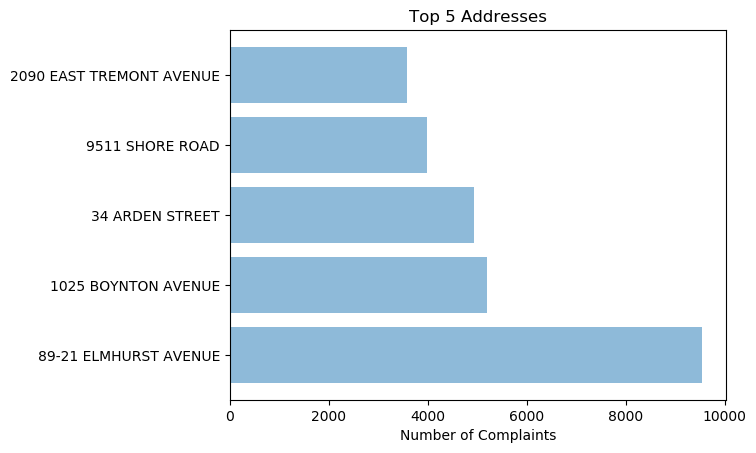

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('89-21 ELMHURST AVENUE', '1025 BOYNTON AVENUE', '34 ARDEN STREET', '9511 SHORE ROAD', '2090 EAST TREMONT AVENUE')
y_pos = np.arange(len(objects))
performance = [9546,5208,4929,3978,3573]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Complaints')
plt.title('Top 5 Addresses')

plt.show()

## It looks like there are four addresses with an unusually high volume of complaints.  Perhaps these building are unusually old and or large.

### 89-21 ELMHURST AVENUE             9546
### 1025 BOYNTON AVENUE               5208
### 34 ARDEN STREET                   4929
### 9511 SHORE ROAD                   3978


In [53]:
df1['street_name'].value_counts() # total count of complaints by street name

GRAND CONCOURSE               20439
BROADWAY                      14476
ELMHURST AVENUE                9955
OCEAN AVENUE                   9305
MORRIS AVENUE                  9130
BOYNTON AVENUE                 8405
ST NICHOLAS AVENUE             7917
AMSTERDAM AVENUE               6879
DR M L KING JR BOULEVARD       6358
OCEAN PARKWAY                  5901
LINDEN BOULEVARD               5689
ARDEN STREET                   5634
DECATUR AVENUE                 5286
SEDGWICK AVENUE                5180
WALTON AVENUE                  5159
EAST TREMONT AVENUE            4908
CRESTON AVENUE                 4858
BEDFORD AVENUE                 4853
NOSTRAND AVENUE                4728
FULTON STREET                  4710
RIVERSIDE DRIVE                4585
EASTERN PARKWAY                4516
SHORE ROAD                     4516
2 AVENUE                       4405
WASHINGTON AVENUE              4261
SHERIDAN AVENUE                4161
DAVIDSON AVENUE                4141
3 AVENUE                    

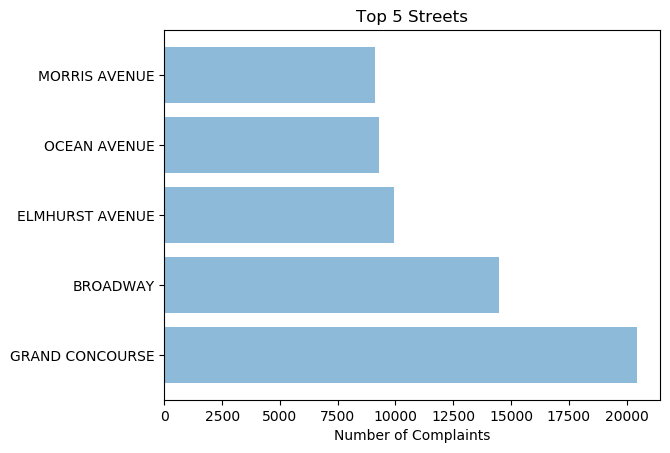

In [17]:
objects = ('GRAND CONCOURSE', 'BROADWAY', 'ELMHURST AVENUE', 'OCEAN AVENUE', 'MORRIS AVENUE')
y_pos = np.arange(len(objects))
performance = [20439,14476,9955,9305,9130]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Complaints')
plt.title('Top 5 Streets')

plt.show()

### The top two streets stick out to me and appear to have provided a substantial amount of heat and hot water complaints over the years.  Perhaps this means utility infrastructure is bad on these streets, or maybe the streets are more populated with older and larger buildings.

In [54]:
df1['incident_zip'].value_counts() # total number of Heat/Hot Water complaints by zip code.

11226.0    38429
10458.0    35857
10467.0    34945
10468.0    31460
10453.0    31395
10452.0    25900
10031.0    25255
10457.0    24866
10456.0    23764
10462.0    23556
11225.0    22974
11213.0    21298
10040.0    21092
10472.0    20158
10032.0    18944
10460.0    18372
10463.0    18261
10033.0    17907
11212.0    17775
11233.0    16102
11373.0    15714
10451.0    15278
11203.0    14344
10025.0    13845
11221.0    13749
10034.0    13653
10466.0    13301
11207.0    13167
11216.0    13114
10027.0    12772
           ...  
10044.0      217
10464.0      210
10312.0      183
10309.0      173
11426.0      172
10007.0      158
10006.0      149
10282.0      143
11004.0      133
10308.0      115
11362.0       98
10307.0       87
11001.0       66
10005.0       59
10004.0       47
11697.0       46
11040.0       40
10280.0       40
11109.0       18
10069.0       17
11005.0        7
10162.0        5
10041.0        3
10020.0        2
10169.0        2
10121.0        1
10129.0        1
10103.0       

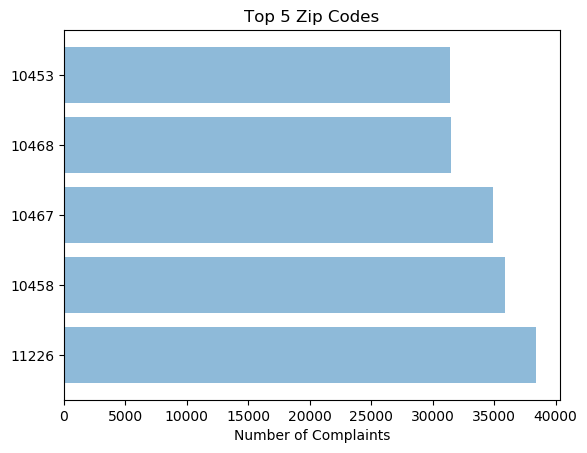

In [19]:
objects = ('11226', '10458', '10467', '10468', '10453')
y_pos = np.arange(len(objects))
performance = [38429,35857,34945,31460,31395]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Complaints')
plt.title('Top 5 Zip Codes')

plt.show()

### The top five zipcodes stick out to me a little bit, but they aren't drastically higher than those below them, as there seems to be a pretty smooth downward trend in the number of complaints as you descend the output list.

### 11226 ----  38429
### 10458 ----  35857
### 10467 ----  34945
### 10468 ----  31460
### 10453 ----  31395

In [55]:
df1['borough'].value_counts() # total number of Heat/Hot Water complaints by borough.

BRONX            376186
BROOKLYN         354626
MANHATTAN        262520
QUEENS           153404
STATEN ISLAND     11479
Unspecified           1
Name: borough, dtype: int64

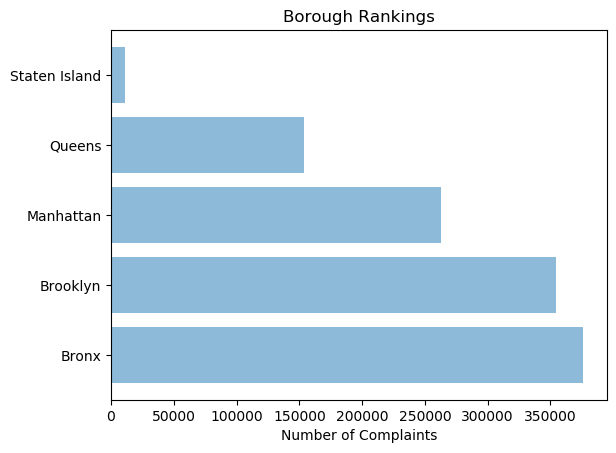

In [20]:
objects = ('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island')
y_pos = np.arange(len(objects))
performance = [376186,354626,262520,153404,11479]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Complaints')
plt.title('Borough Rankings')

plt.show()

### The borough with the most heat/hot water complaints is the Bronx, followed closely by Brooklyn.  If we were going to pick a borough to focus on, the Bronx would be a good start.

# Conclusions and Remarks

## It seems like there are several geographic possibilites depending on the scale the city would want to approach this.  At the Borough level, focus on the Bronx.  At the zip code level, focus on zip code 11226.  At the street level, focus on Grand Concourse.  And finally, at the address level, focus on 89-21 Elmhurst Avenue.